In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/apple_sales_2024.csv')
df.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [3]:
df.tail()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49
999,Shanghai,Greater China,26.30,4.06,3.41,5.69,14.29


In [4]:
df.shape

(1000, 7)

In [5]:
df.dtypes

,0
State,object
Region,object
iPhone Sales (in million units),float64
iPad Sales (in million units),float64
Mac Sales (in million units),float64
Wearables (in million units),float64
Services Revenue (in billion $),float64


In [6]:
df.describe()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.444500,8.565880,5.555760,6.935500,12.447130
std,7.180077,3.735994,2.506491,2.951677,4.306347
min,5.030000,2.020000,1.010000,2.000000,5.010000
25%,11.447500,5.432500,3.470000,4.330000,8.710000
50%,17.130000,8.695000,5.550000,6.815000,12.205000
75%,23.715000,11.740000,7.730000,9.532500,16.252500
max,29.940000,14.990000,9.990000,12.000000,19.920000


In [7]:
df.isnull().sum()

,0
State,0
Region,0
iPhone Sales (in million units),0
iPad Sales (in million units),0
Mac Sales (in million units),0
Wearables (in million units),0
Services Revenue (in billion $),0


# Overall Performance

Q What is total revenue per product category?

In [77]:
df['Services Revenue (in million $)']=df['Services Revenue (in billion $)']*1000

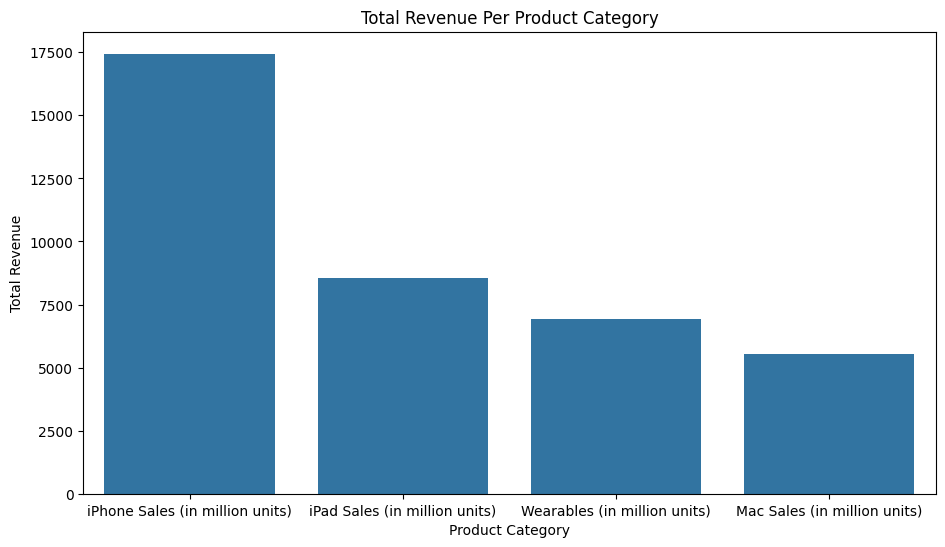

In [78]:
product=['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']
prod_category=df[product].sum().sort_values(ascending=False)
plt.figure(figsize=(11,6))
sns.barplot(x=prod_category.index,y=prod_category.values)
plt.title('Total Revenue Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

.* iphone sales is maximum

Q What is total revenue across all categories?

In [79]:
total_rev=prod_category.sum()+df['Services Revenue (in million $)'].sum()
total_rev

np.float64(12447168501.64)

Q Which product category contribute the most?

In [11]:
prod=prod_category.index.max()
prod

'iPhone Sales (in million units)'

# Geographical Analysis

Q What is the total revenue by state?

In [80]:
prod_sum=['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)','Services Revenue (in million $)']
df['total_rev']=df[prod_sum].sum(axis=1)

In [82]:
state_rev=df.groupby('State')['total_rev'].sum().sort_values(ascending=False)
state_rev.head()


,total_rev
State,
Hong Kong,6.315120e+08
South Africa,6.002218e+08
California,5.916719e+08
UK,5.690518e+08
Canada,5.501517e+08


Q Which region generate highest overall revenue?

In [14]:
region_rev=df.groupby('Region')['total_rev'].sum().sort_values(ascending=False)
region_rev.index.max()

'Rest of World'

Q What is the top 5 performing state for each product?

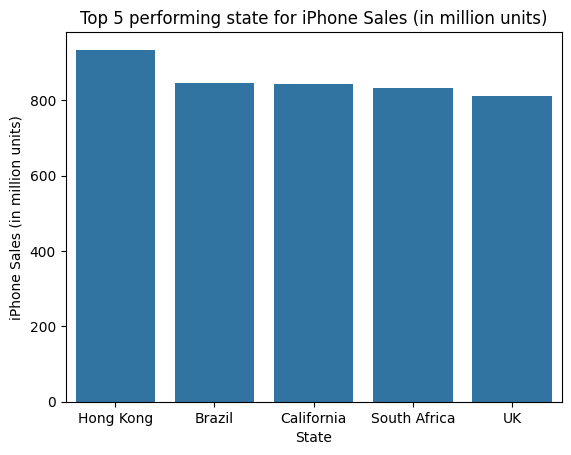

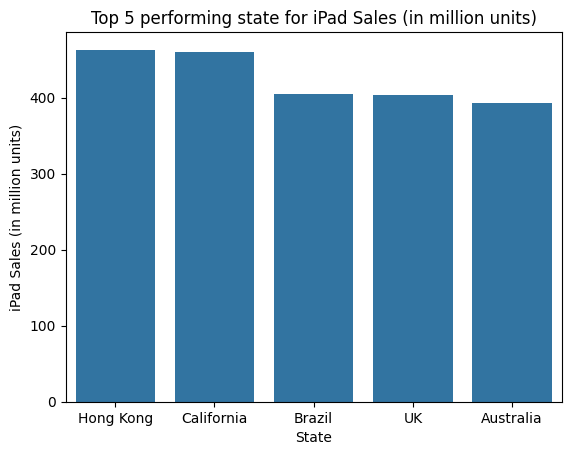

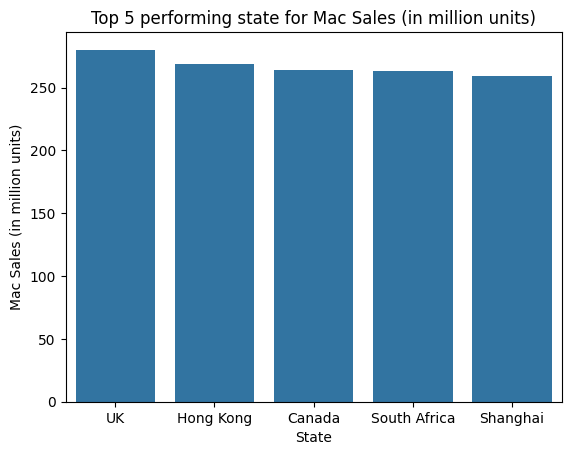

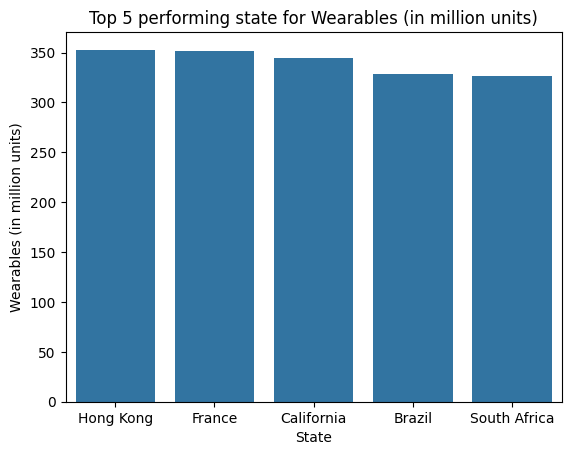

In [15]:
for p in product:
  top5=df.groupby('State')[p].sum().sort_values(ascending=False).head(5)
  sns.barplot(x=top5.index,y=top5.values)
  plt.title(f'Top 5 performing state for {p}')
  plt.xlabel('State')
  plt.ylabel(f'{p}')
  plt.show()

Q How does sales distribution vary by region?

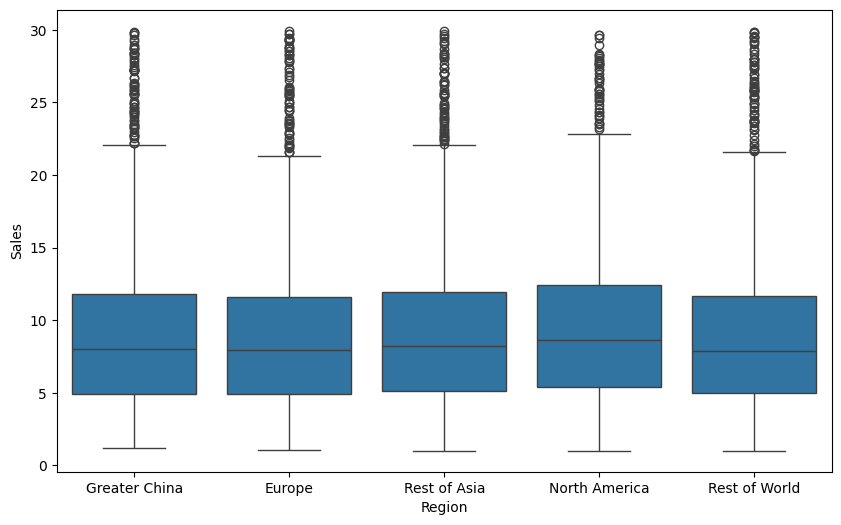

In [16]:
melted_df=pd.melt(df,id_vars='Region',value_vars=product,var_name='Product',value_name='Sales')
plt.figure(figsize=(10,6))
sns.boxplot(x='Region',y='Sales',data=melted_df)
plt.show()

# Product Comparison

Q How do sales of iphones compare to ipads, macs etc across the country?

In [17]:
grouped=df.groupby('State')[product].sum().reset_index()
grouped.head()

,State,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
0,Australia,642.96,393.68,238.93,267.50
1,Beijing,757.27,344.28,238.24,284.83
2,Brazil,844.50,405.45,240.84,328.77
3,California,843.34,459.86,250.88,345.03
4,Canada,784.68,332.87,263.73,299.30


In [18]:
melt_df=grouped.melt(id_vars='State',value_vars=product,var_name='Product',value_name='Sales')
melt_df

,State,Product,Sales
0,Australia,iPhone Sales (in million units),642.96
1,Beijing,iPhone Sales (in million units),757.27
2,Brazil,iPhone Sales (in million units),844.50
3,California,iPhone Sales (in million units),843.34
4,Canada,iPhone Sales (in million units),784.68
...,...,...,...
95,South Korea,Wearables (in million units),235.68
96,Spain,Wearables (in million units),239.48
97,Texas,Wearables (in million units),233.61
98,Thailand,Wearables (in million units),256.03


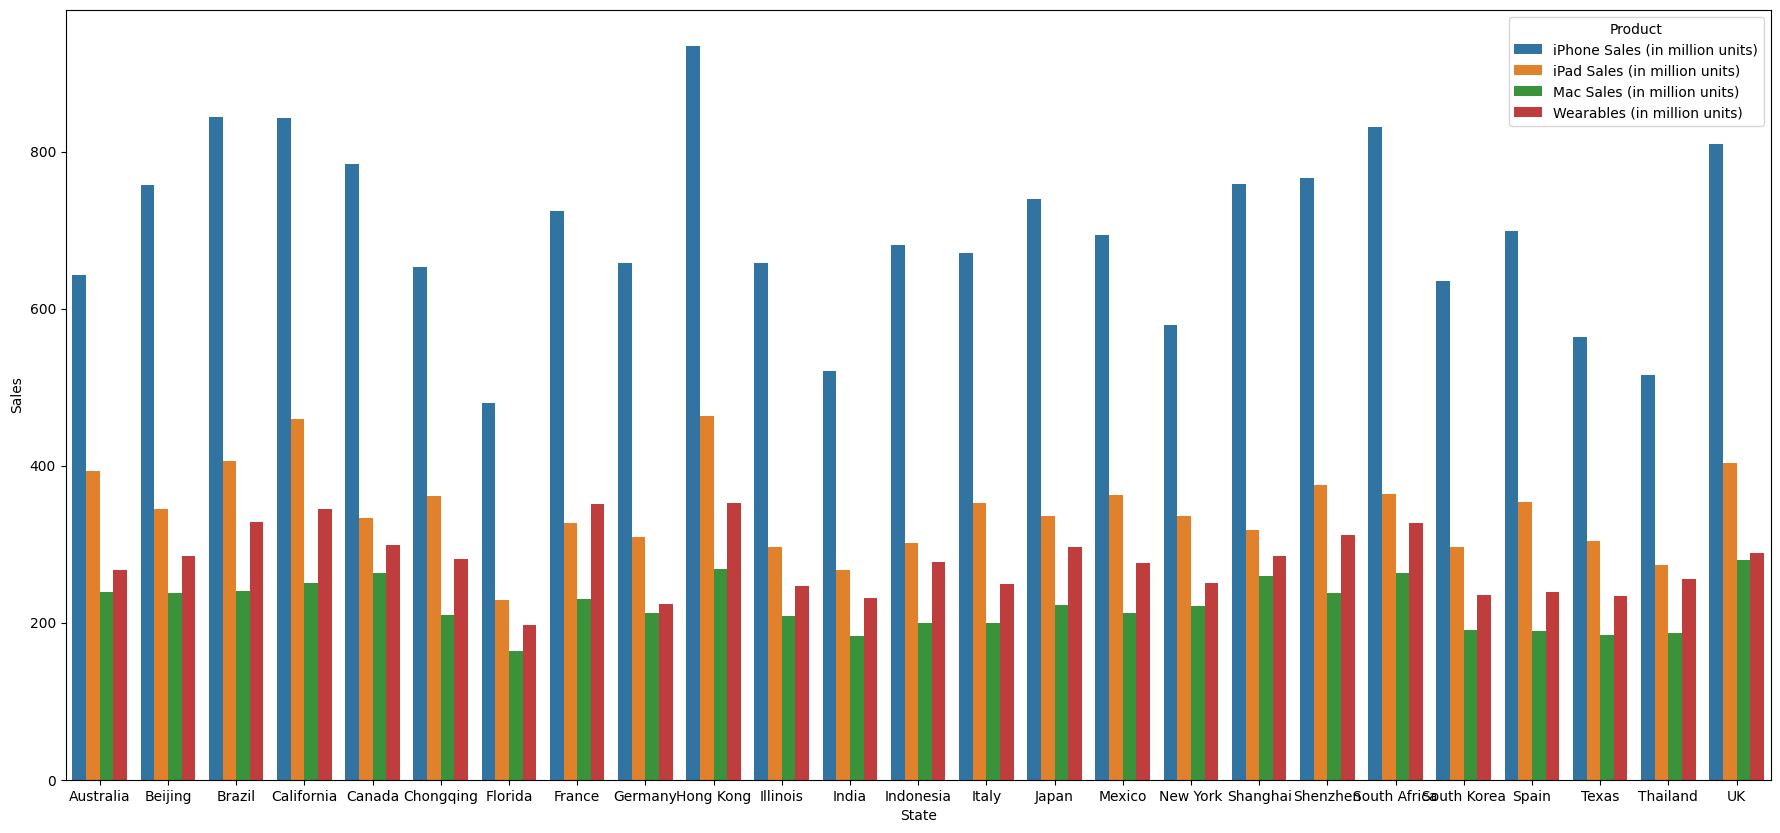

In [19]:
plt.figure(figsize=(22,10))
sns.barplot(x='State',y='Sales',data=melt_df,hue='Product')
plt.show()

Q What is the product mix per region?

In [41]:
region_sales=df.groupby('Region')[product].sum()
region_sales

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
Region,,,,
Europe,3563.12,1745.66,1111.22,1353.12
Greater China,3868.28,1862.95,1212.80,1514.86
North America,3124.14,1625.44,1028.96,1272.92
Rest of Asia,3091.50,1473.26,982.94,1296.29
Rest of World,3797.46,1858.57,1219.84,1498.31


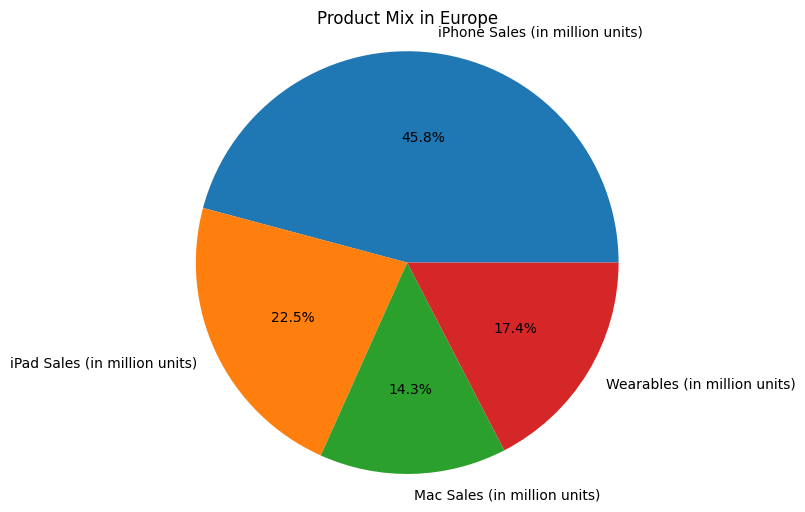

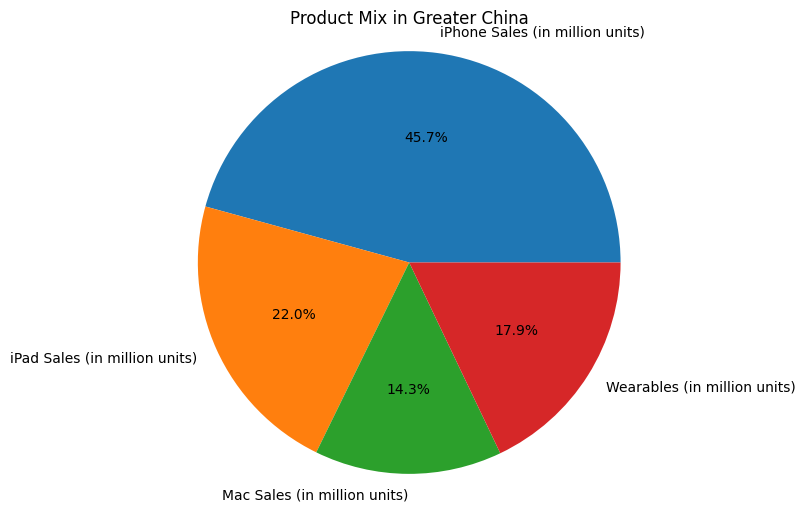

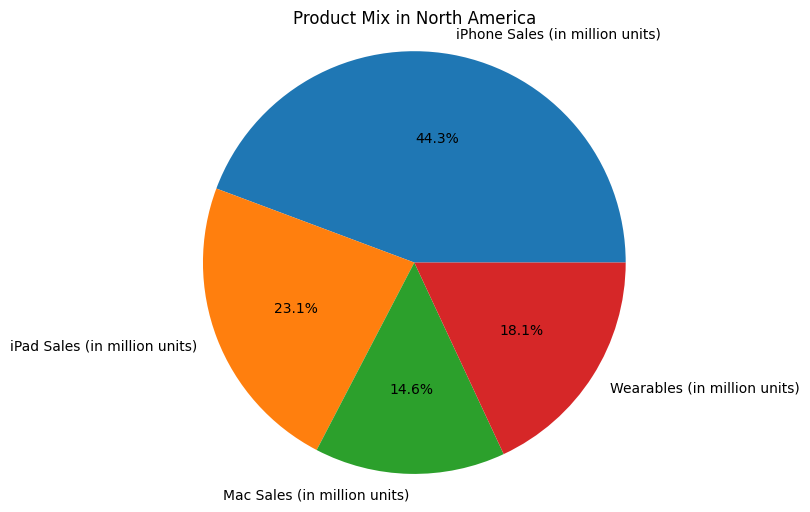

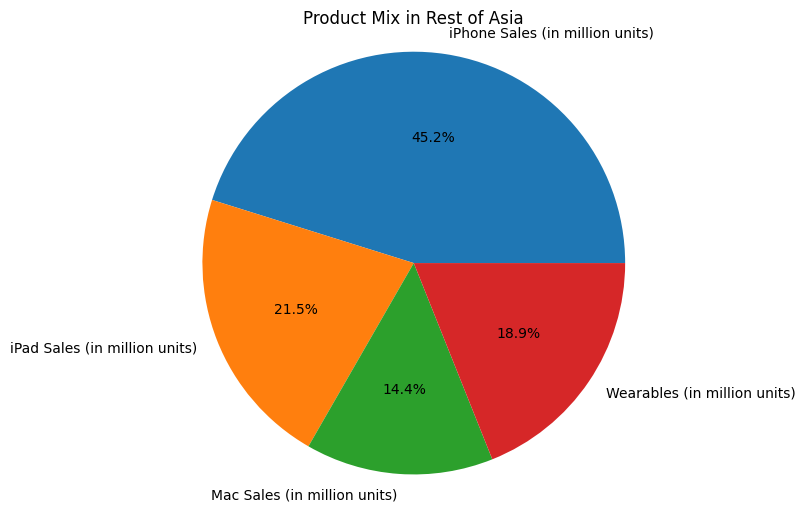

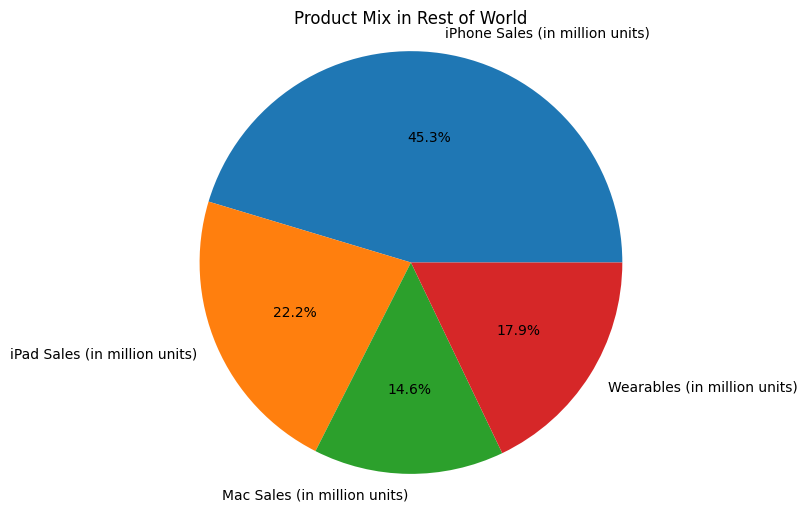

In [43]:
for region in region_sales.index:
    mix = (region_sales.loc[region] / region_sales.loc[region].sum()) * 100

    plt.figure(figsize=(6, 6))
    plt.pie(mix, labels=mix.index,autopct='%1.1f%%')
    plt.title(f'Product Mix in {region}')
    plt.axis('equal')
    plt.show()


Q Which region is most dependent on service revenue or wearables?

In [83]:
prod_col=['iPhone Sales (in million units)','iPad Sales (in million units)','Wearables (in million units)','Services Revenue (in million $)']
region_sales=df.groupby('Region')[prod_col].sum()
region_sales

,iPhone Sales (in million units),iPad Sales (in million units),Wearables (in million units),Services Revenue (in million $)
Region,,,,
Europe,3563.12,1745.66,1353.12,2.416300e+09
Greater China,3868.28,1862.95,1514.86,2.780720e+09
North America,3124.14,1625.44,1272.92,2.281210e+09
Rest of Asia,3091.50,1473.26,1296.29,2.267150e+09
Rest of World,3797.46,1858.57,1498.31,2.701750e+09


In [84]:
region_sales['Total_Revenue'] = region_sales.sum(axis=1)
region_sales

,iPhone Sales (in million units),iPad Sales (in million units),Wearables (in million units),Services Revenue (in million $),Total_Revenue
Region,,,,,
Europe,3563.12,1745.66,1353.12,2.416300e+09,2.416307e+09
Greater China,3868.28,1862.95,1514.86,2.780720e+09,2.780727e+09
North America,3124.14,1625.44,1272.92,2.281210e+09,2.281216e+09
Rest of Asia,3091.50,1473.26,1296.29,2.267150e+09,2.267156e+09
Rest of World,3797.46,1858.57,1498.31,2.701750e+09,2.701757e+09


In [86]:
region_sales['Wearables %']=(region_sales['Wearables (in million units)']/region_sales['Total_Revenue'])*100
w=region_sales['Wearables %'].idxmax()
region_sales['Service %']=(region_sales['Services Revenue (in million $)']/region_sales['Total_Revenue'])*100
w=region_sales['Wearables %'].idxmax()
s=region_sales['Service %'].idxmax()
w,s

('Rest of Asia', 'Rest of Asia')

# Proportions & Contributions

Q What percentage of total revenue comes from each product category?

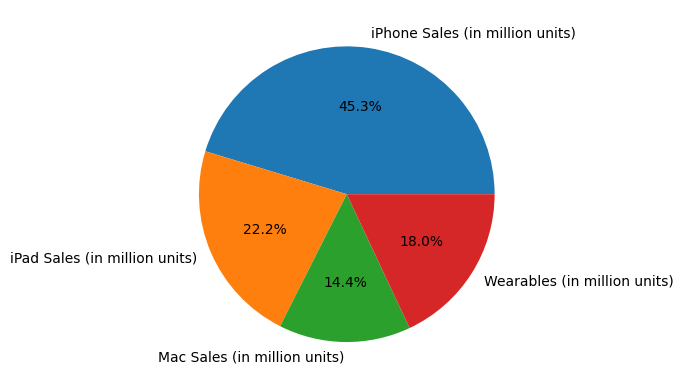

In [37]:
total_by_product=df[product].sum()
total_percentage=(total_by_product/total_by_product.sum())*100
plt.pie(total_percentage,labels=total_percentage.index,autopct='%1.1f%%')
plt.show()

Q For each state what is the revenue contribution of each product?

In [45]:
state_sales=df.groupby('State')[product].sum()
state_sales.head()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
State,,,,
Australia,642.96,393.68,238.93,267.50
Beijing,757.27,344.28,238.24,284.83
Brazil,844.50,405.45,240.84,328.77
California,843.34,459.86,250.88,345.03
Canada,784.68,332.87,263.73,299.30


In [48]:
state_sales_rev=state_sales.div(state_sales.sum(axis=1),axis=0)
state_sales_rev.head()


,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
State,,,,
Australia,0.416676,0.255128,0.154841,0.173356
Beijing,0.466121,0.211914,0.146644,0.175321
Brazil,0.464123,0.222829,0.132362,0.180687
California,0.444071,0.242145,0.132104,0.181680
Canada,0.466910,0.198069,0.156928,0.178093


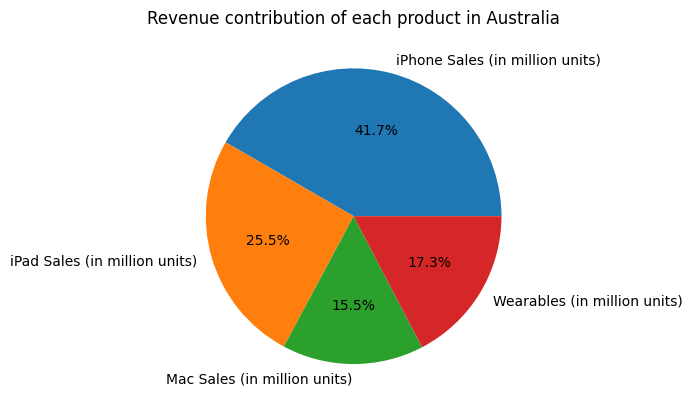

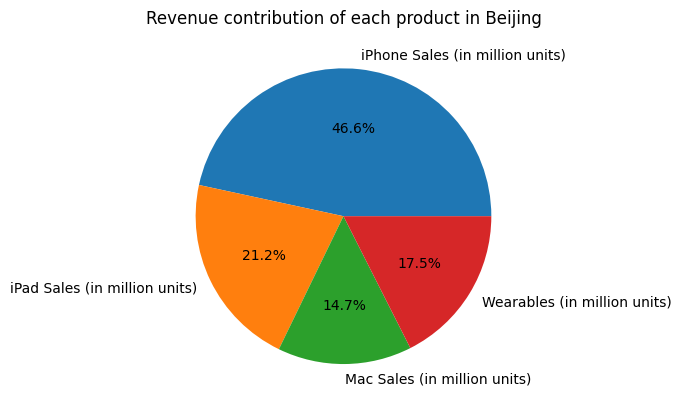

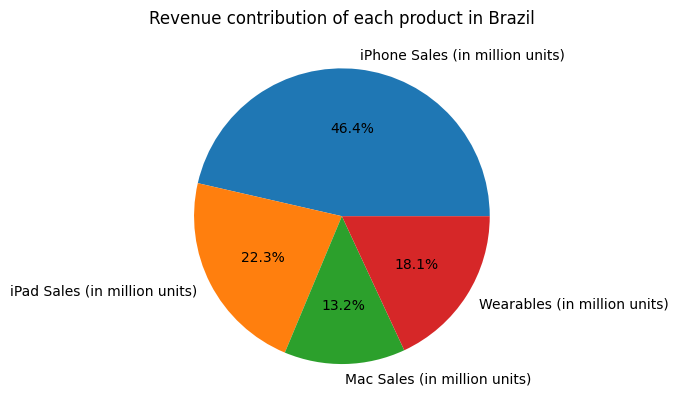

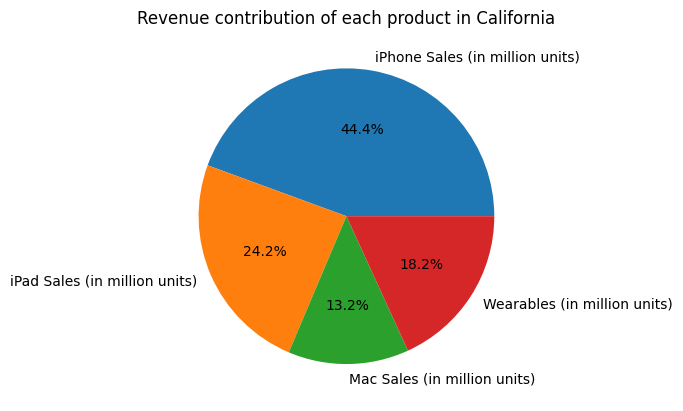

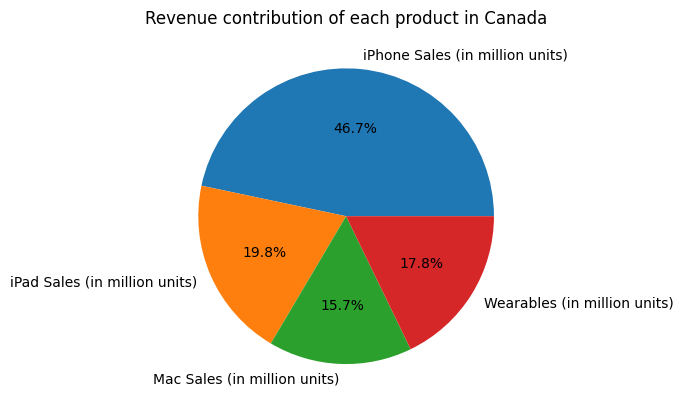

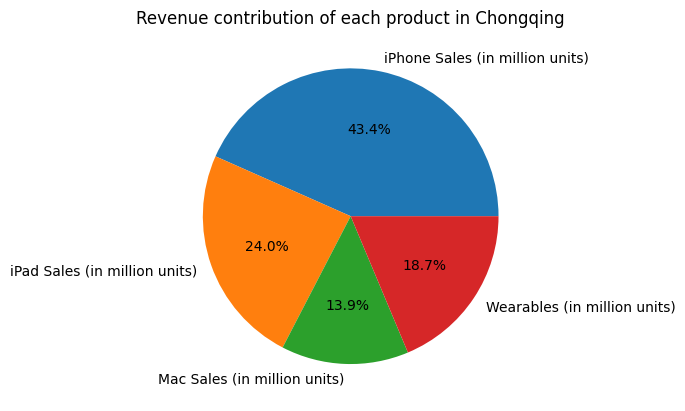

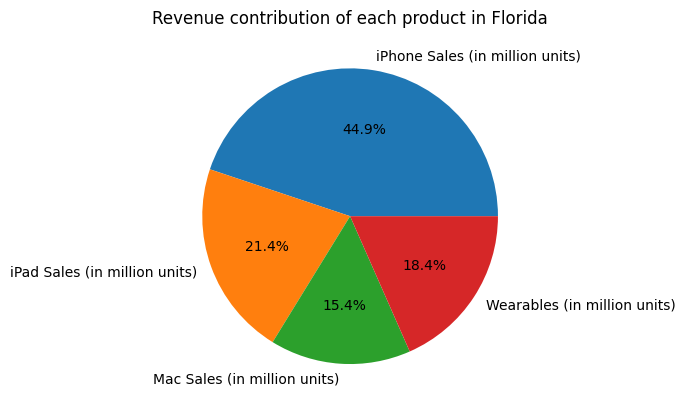

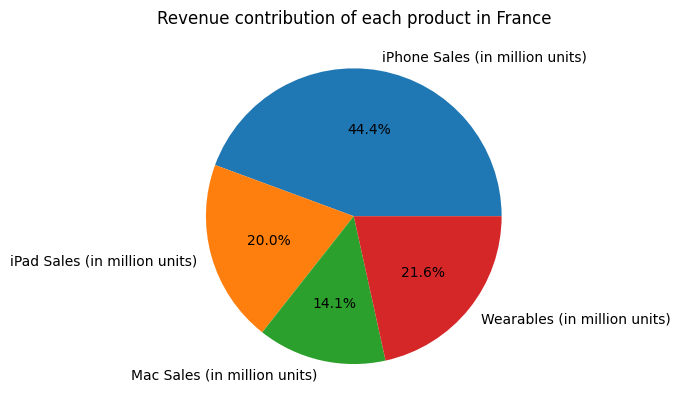

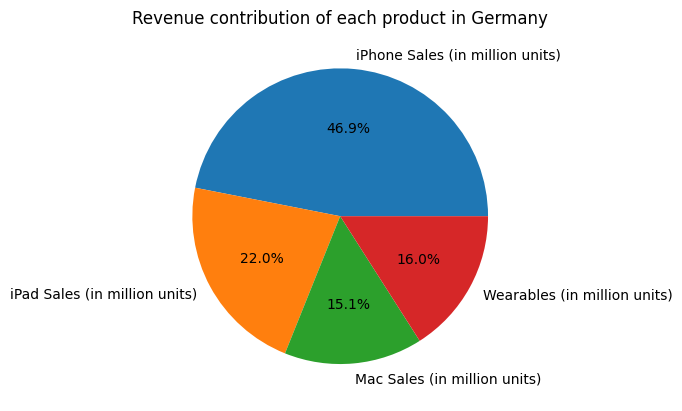

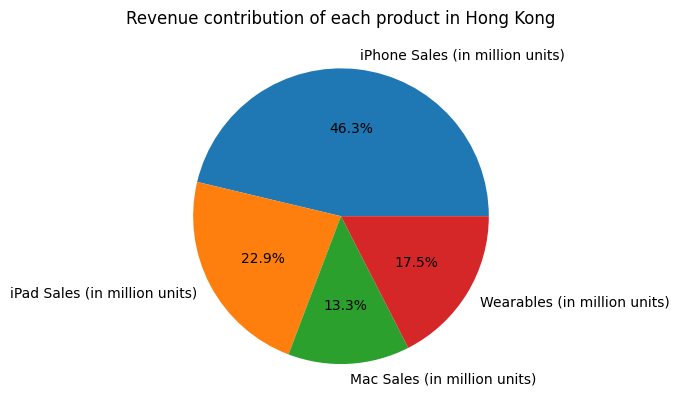

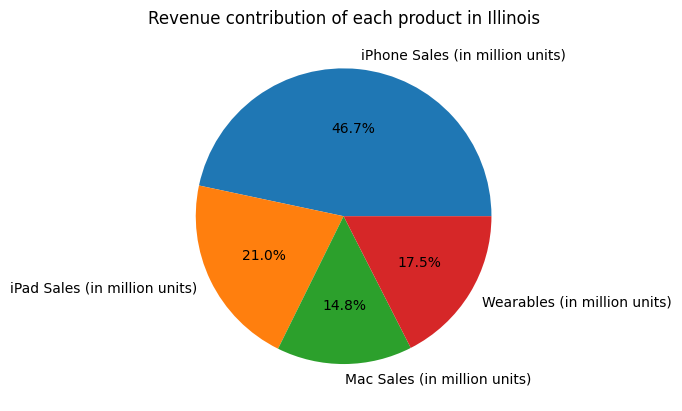

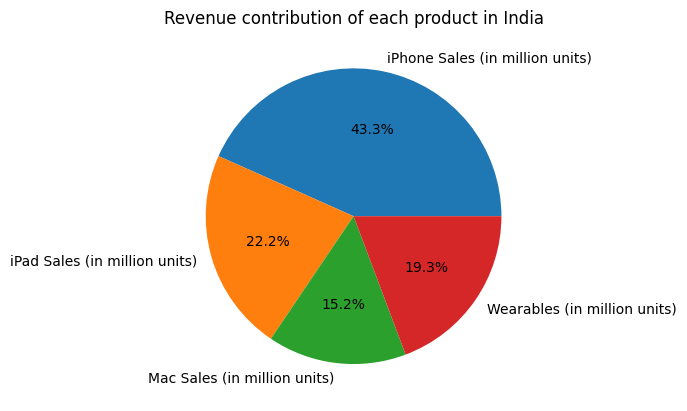

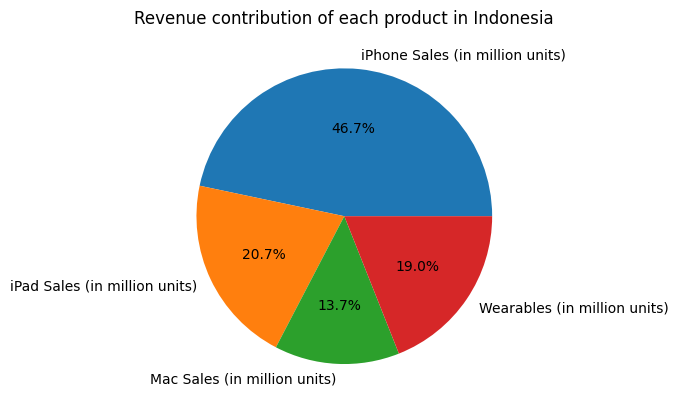

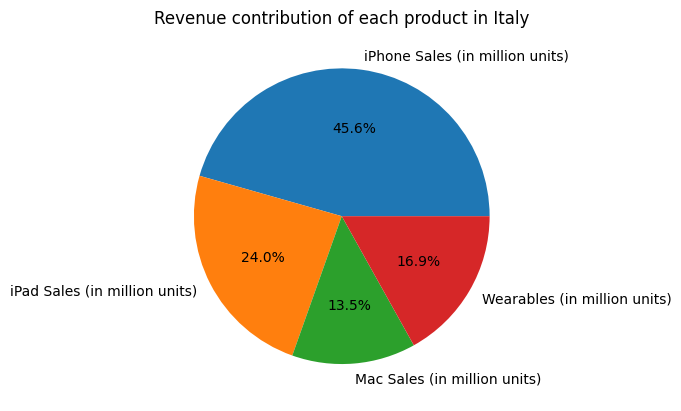

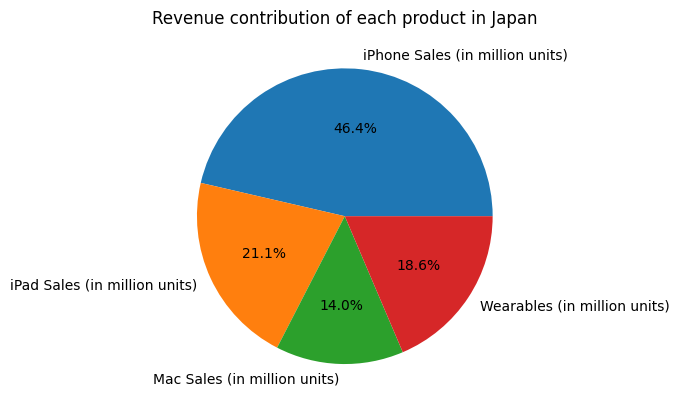

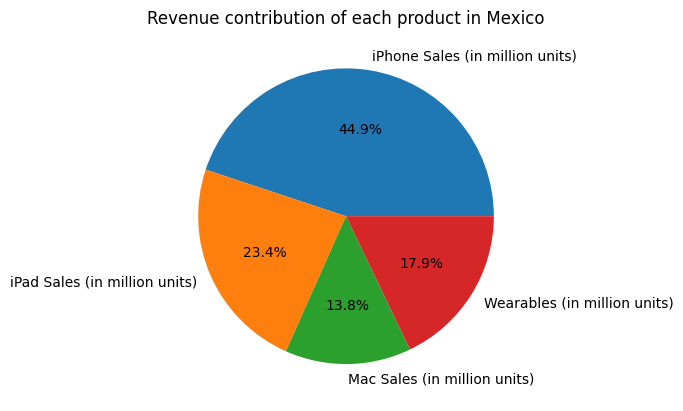

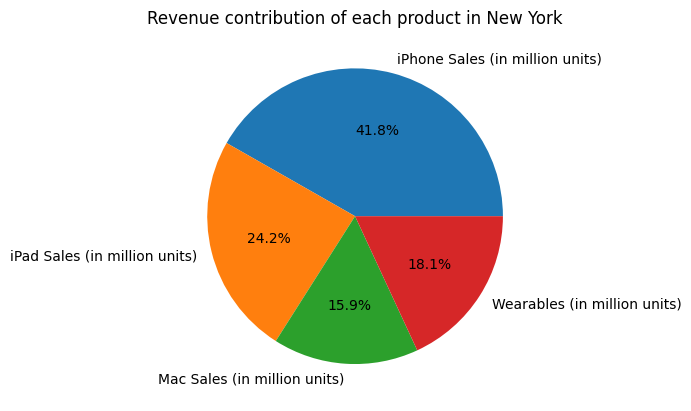

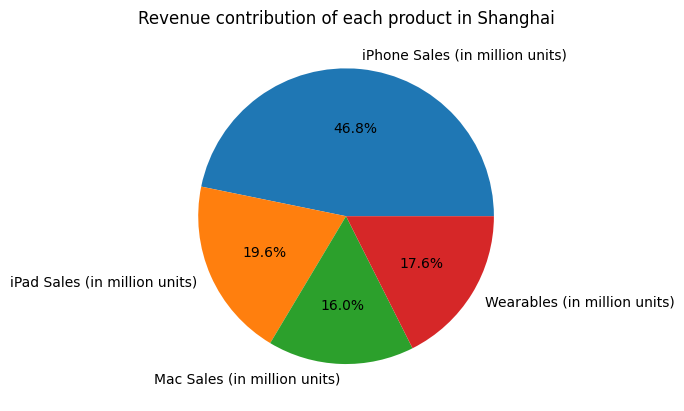

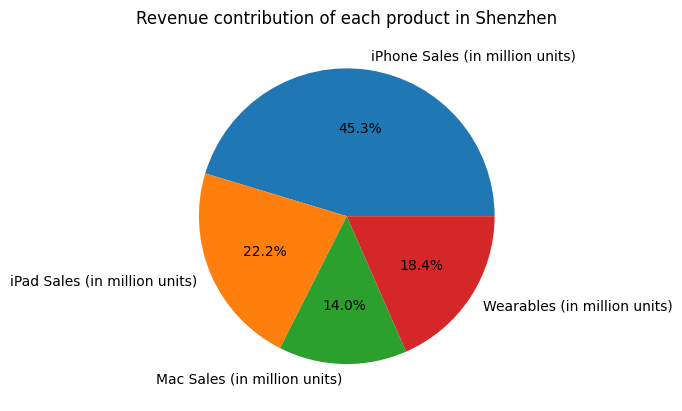

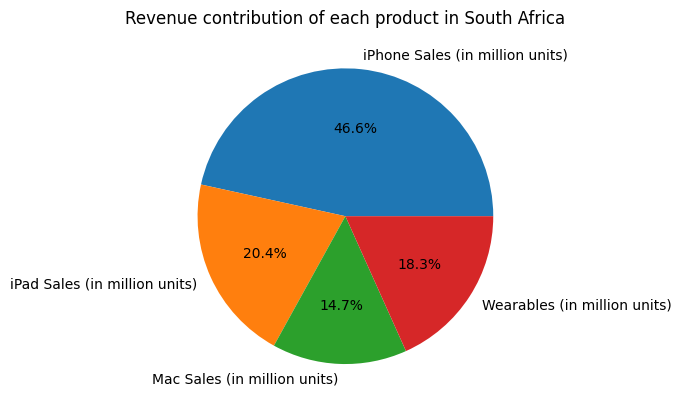

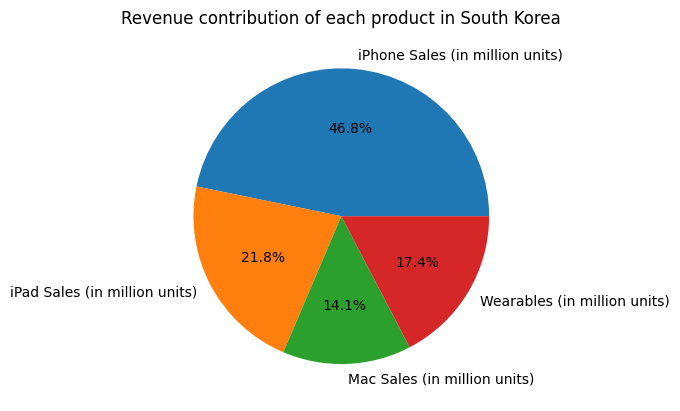

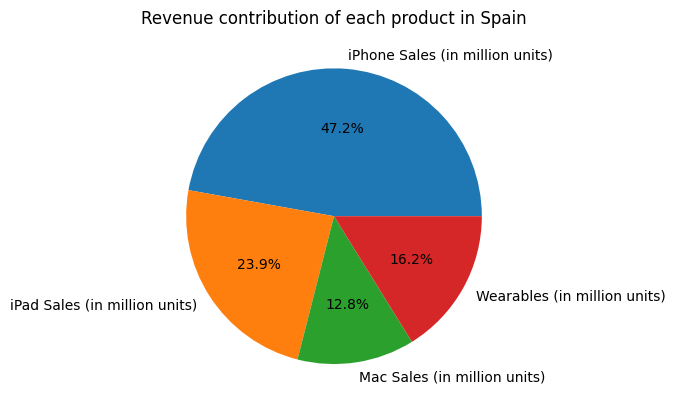

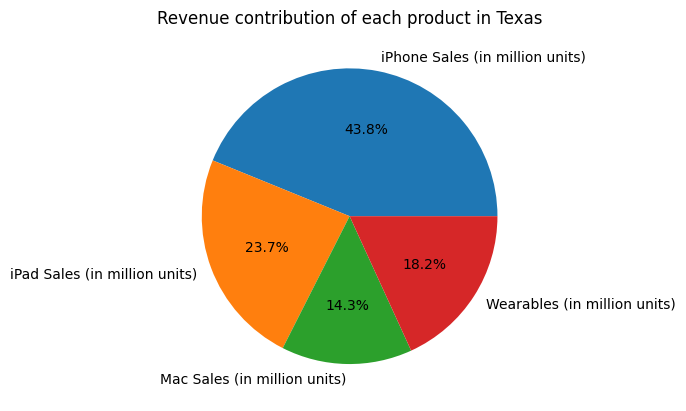

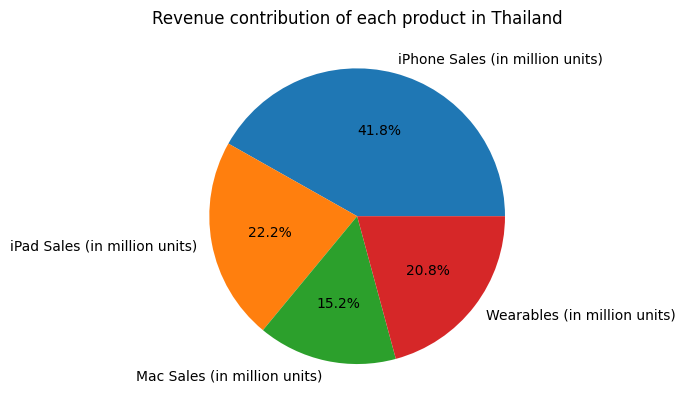

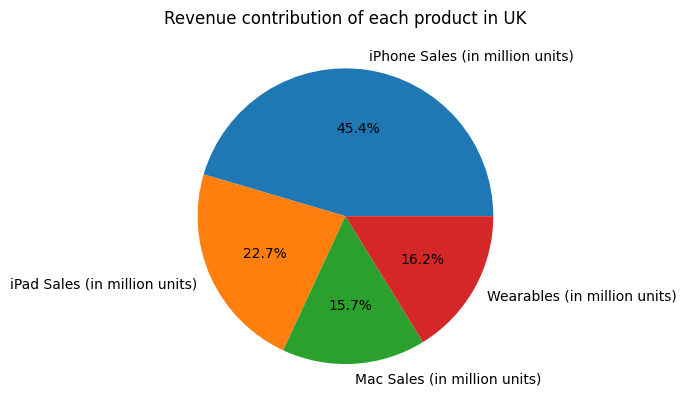

In [52]:
for s in state_sales_rev.index:
  plt.pie(state_sales_rev.loc[s],labels=state_sales_rev.columns,autopct='%1.1f%%')
  plt.title(f'Revenue contribution of each product in {s}')
  plt.show()

Q Are some regions more balanced in product sales vs others?

In [53]:
product_sales=df.groupby('Region')[product].sum()
product_sales.head()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
Region,,,,
Europe,3563.12,1745.66,1111.22,1353.12
Greater China,3868.28,1862.95,1212.80,1514.86
North America,3124.14,1625.44,1028.96,1272.92
Rest of Asia,3091.50,1473.26,982.94,1296.29
Rest of World,3797.46,1858.57,1219.84,1498.31


In [54]:
region_sales_rev=product_sales.div(product_sales.sum(axis=1),axis=0)
region_sales_rev.head()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
Region,,,,
Europe,0.458390,0.224576,0.142957,0.174077
Greater China,0.457303,0.220236,0.143376,0.179085
North America,0.443049,0.230511,0.145922,0.180519
Rest of Asia,0.451710,0.215263,0.143621,0.189406
Rest of World,0.453472,0.221941,0.145667,0.178920


In [60]:
region_balance=region_sales_rev.std(axis=1).sort_values(ascending=True)
region_balance

,0
Region,
North America,0.133301
Rest of Asia,0.137698
Rest of World,0.139195
Greater China,0.141725
Europe,0.142940


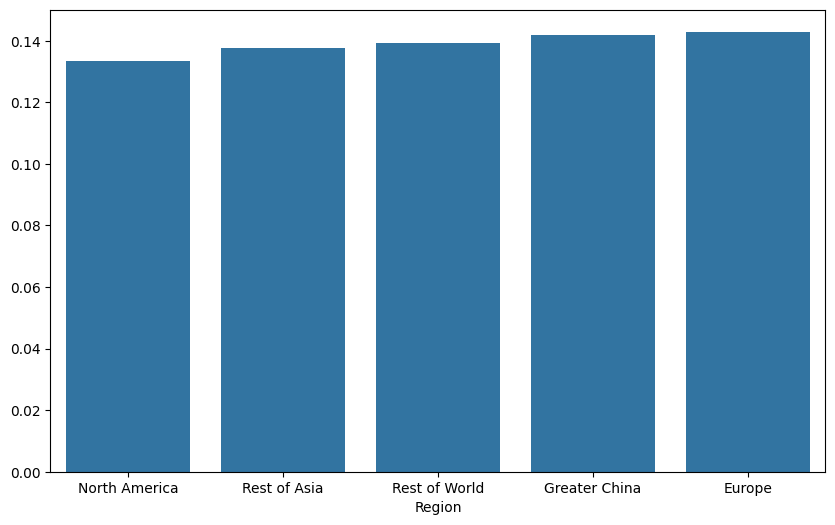

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_balance.index,y=region_balance.values)
plt.show()

* North America seems to have more balanced product sales than others

# Insights Driven

Q Are there regions that outperform in services but umderperform in hardware?

In [87]:
df['hardware_rev']=df[['iPhone Sales (in million units)','iPad Sales (in million units)','Mac Sales (in million units)','Wearables (in million units)']].sum(axis=1)
region_sales=df.groupby('Region')[['Services Revenue (in million $)','hardware_rev']].sum().reset_index()
region_sales.head()

,Region,Services Revenue (in million $),hardware_rev
0,Europe,2.416300e+09,7773.12
1,Greater China,2.780720e+09,8458.89
2,North America,2.281210e+09,7051.46
3,Rest of Asia,2.267150e+09,6843.99
4,Rest of World,2.701750e+09,8374.18


In [93]:
melted_df=region_sales.melt(id_vars='Region',value_vars=['Services Revenue (in million $)','hardware_rev'],var_name='Category',value_name='sales')
melted_df.head()

,Region,Category,sales
0,Europe,Services Revenue (in million $),2.416300e+09
1,Greater China,Services Revenue (in million $),2.780720e+09
2,North America,Services Revenue (in million $),2.281210e+09
3,Rest of Asia,Services Revenue (in million $),2.267150e+09
4,Rest of World,Services Revenue (in million $),2.701750e+09


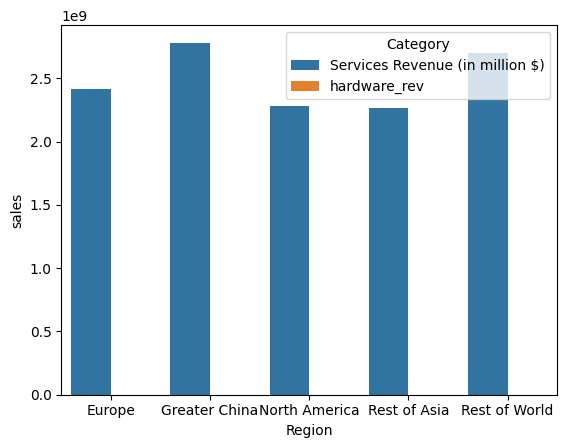

<Figure size 2000x800 with 0 Axes>

In [92]:
sns.barplot(x='Region',y='sales',hue='Category',data=melted_df)
plt.figure(figsize=(20,8))
plt.show()

Q Are wearables more popular in some regions?

In [99]:
region_total=df.groupby('Region')[product].sum()
region_total.head()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units)
Region,,,,
Europe,3563.12,1745.66,1111.22,1353.12
Greater China,3868.28,1862.95,1212.80,1514.86
North America,3124.14,1625.44,1028.96,1272.92
Rest of Asia,3091.50,1473.26,982.94,1296.29
Rest of World,3797.46,1858.57,1219.84,1498.31


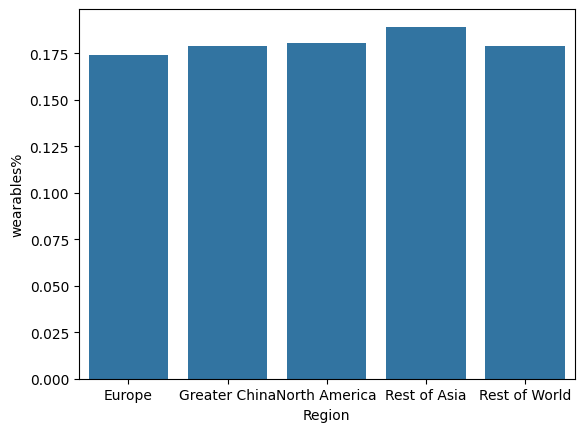

In [101]:
region_total['wearables%']=(region_total['Wearables (in million units)']/region_total.sum(axis=1))
sns.barplot(x=region_total.index,y=region_total['wearables%'])
plt.show()

Q Is there any correlation between iphone and service revenue?

In [102]:
corr_mat=df[['iPhone Sales (in million units)','Services Revenue (in million $)']].corr()
corr_mat

,iPhone Sales (in million units),Services Revenue (in million $)
iPhone Sales (in million units),1.00000,-0.02223
Services Revenue (in million $),-0.02223,1.00000


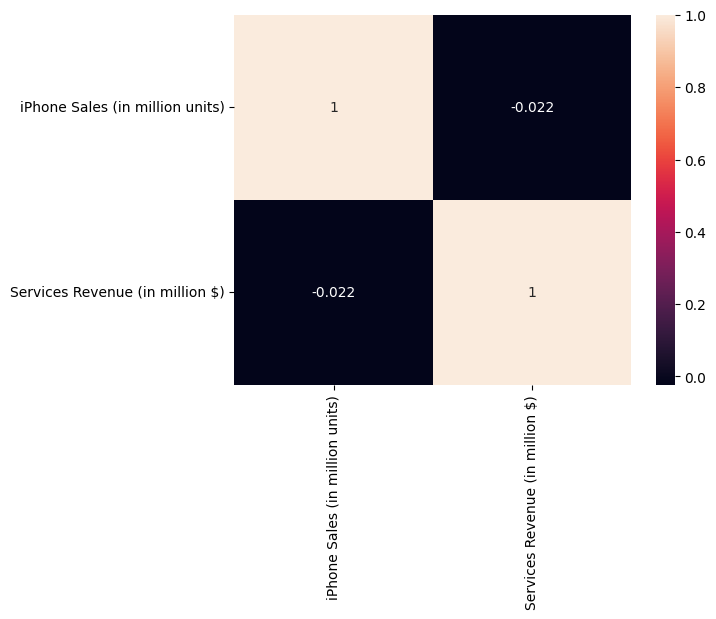

In [103]:
sns.heatmap(corr_mat,annot=True)
plt.show()

* There is no relationship between iphone sales and service rev
* Iphone buyers not neccessarily spends more on services
* this goes against the rule of upselling